#### 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 보이스피싱 일자별 신고데이터 로드

In [2]:
voice_df = pd.read_csv('./data/voice_fishing_by_day.csv',index_col='접수완료일시_연월일')
voice_df


,접수완료일시
접수완료일시_연월일,
2020-01-02,29
2020-01-03,31
2020-01-04,6
2020-01-05,2
2020-01-06,14
...,...
2023-01-14,12
2023-01-15,9
2023-01-16,23


In [3]:
voice_df.index = pd.DatetimeIndex(voice_df.index)

In [4]:
#접수 NA값을 신고가 없다고 판단하고 0으로 보간
voice_df = pd.DataFrame(voice_df['접수완료일시'].resample('D').mean().fillna(0))
voice_df


,접수완료일시
접수완료일시_연월일,
2020-01-02,29.0
2020-01-03,31.0
2020-01-04,6.0
2020-01-05,2.0
2020-01-06,14.0
...,...
2023-01-14,12.0
2023-01-15,9.0
2023-01-16,23.0


In [5]:
voice_df['Change'] = (voice_df['접수완료일시']/voice_df['접수완료일시'].shift(1))-1

In [6]:
voice_df.loc['2020-11-22']

접수완료일시    0.0
Change   -1.0
Name: 2020-11-22 00:00:00, dtype: float64

In [7]:
voice_df['접수완료일시'].pct_change()

접수완료일시_연월일
2020-01-02         NaN
2020-01-03    0.068966
2020-01-04   -0.806452
2020-01-05   -0.666667
2020-01-06    6.000000
                ...   
2023-01-14   -0.714286
2023-01-15   -0.250000
2023-01-16    1.555556
2023-01-17    0.000000
2023-01-18   -0.434783
Freq: D, Name: 접수완료일시, Length: 1113, dtype: float64

<AxesSubplot:xlabel='접수완료일시_연월일'>

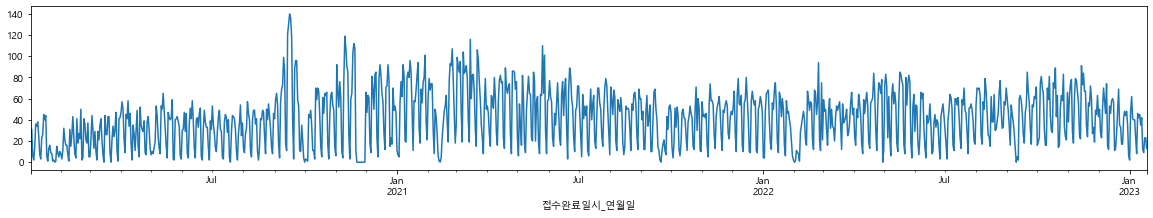

In [8]:
voice_df['접수완료일시'].plot(figsize=(20,3))

<AxesSubplot:xlabel='접수완료일시_연월일'>

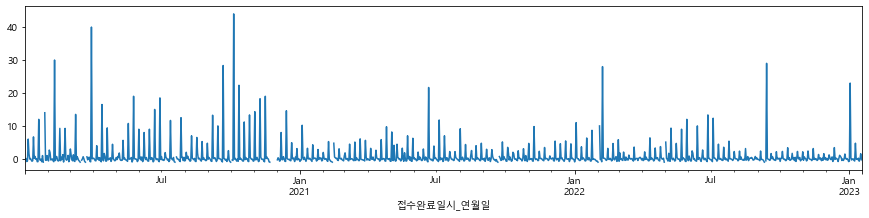

In [9]:
voice_df['Change'].plot(figsize=(15,3))

#### diff를 통한 증감구하기

In [10]:
voice_df['Diff'] = voice_df['접수완료일시'].diff()
voice_df

,접수완료일시,Change,Diff
접수완료일시_연월일,,,
2020-01-02,29.0,NaN,NaN
2020-01-03,31.0,0.068966,2.0
2020-01-04,6.0,-0.806452,-25.0
2020-01-05,2.0,-0.666667,-4.0
2020-01-06,14.0,6.000000,12.0
...,...,...,...
2023-01-14,12.0,-0.714286,-30.0
2023-01-15,9.0,-0.250000,-3.0
2023-01-16,23.0,1.555556,14.0


In [11]:
(voice_df['Change']+1).describe()

count    1104.000000
mean             inf
std              NaN
min         0.000000
25%         0.580411
50%         0.920635
75%         1.341526
max              inf
Name: Change, dtype: float64

c:\Users\pgho8\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


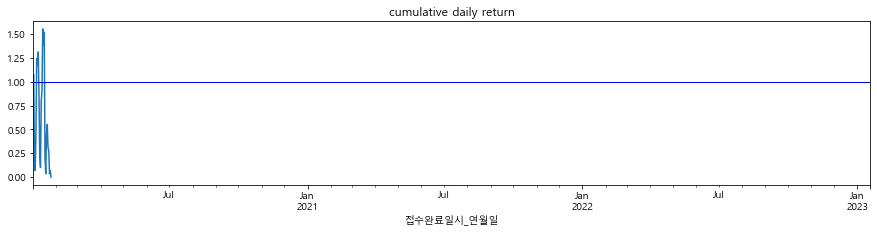

In [12]:
cum_daily_return = (voice_df['Change']+1).cumprod()
cum_daily_return.plot(figsize=(15,3), title='cumulative daily return')
plt.axhline(1, c='b', lw=1)

#### 이동평균, Rolling, Expanding

In [13]:
voice_df['SMA7'] = voice_df['접수완료일시'].rolling(window=7).mean()
voice_df['SMA14'] = voice_df['접수완료일시'].rolling(window=14).mean()

<AxesSubplot:xlabel='접수완료일시_연월일'>

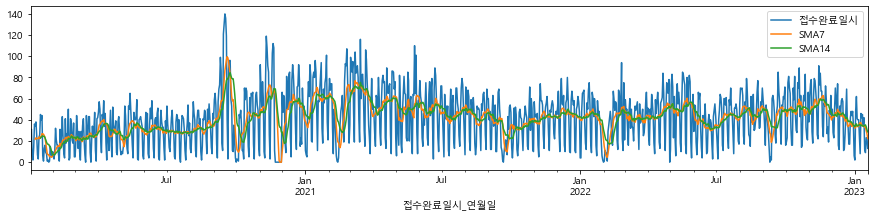

In [14]:
voice_df[['접수완료일시', 'SMA7', 'SMA14']].plot(figsize=(15, 3))


#### 누적이동평균(Cumulative moving average)

In [15]:
voice_df['CMA'] = voice_df['접수완료일시'].expanding(14).mean()

<AxesSubplot:xlabel='접수완료일시_연월일'>

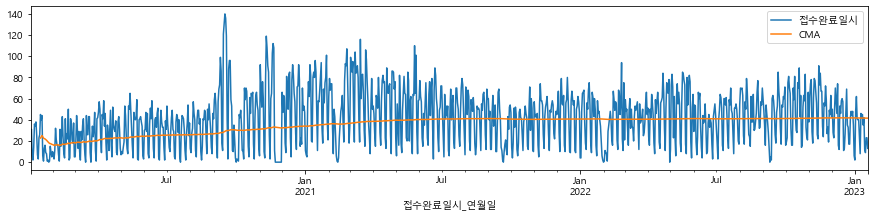

In [16]:
voice_df[['접수완료일시','CMA']].plot(figsize=(15,3))

#### 지수이동평균(Exponential Moving Average)
- 최근 자료에 가중치를 부여하여 최근 가격 변동을 잘 나타낸다.

In [17]:
#exponential weighted moving
#지수함수 x값이 적을수록 변화의 폭이 크고, x값이 커질수록 변화의 폭이 작아진다
#이런 지수함수의 원리를 이용하여 오래된 데이터(현재기준 오차가 커질수록)에 지수감쇠 적용.
voice_df['EWM_short'] = voice_df['접수완료일시'].ewm(span=12).mean()
voice_df['EWM_long'] = voice_df['접수완료일시'].ewm(span=120).mean()

<AxesSubplot:xlabel='접수완료일시_연월일'>

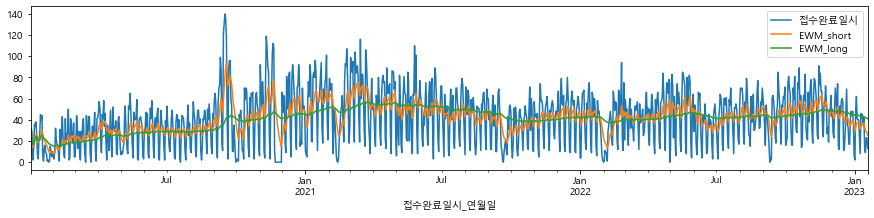

In [18]:
voice_df[['접수완료일시','EWM_short','EWM_long']].plot(figsize=(15,3))

<AxesSubplot:xlabel='접수완료일시_연월일'>

c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


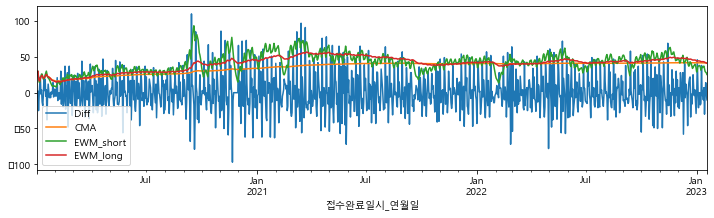

In [19]:
voice_df.iloc[:,[2,5,6,7]].plot(figsize=(12,3))

#### 샘플링
asfreq
- Convert TimeSeries to specified frequency.
- asfreq : 특정 주기 데이터를 반환
- resample : 특정 주기의 그룹화된 데이터를 반환

In [20]:
voice_df.index = pd.DatetimeIndex(voice_df.index)

In [21]:
voice_df['접수완료일시'].asfreq('D',method='bfill').head(10)

접수완료일시_연월일
2020-01-02    29.0
2020-01-03    31.0
2020-01-04     6.0
2020-01-05     2.0
2020-01-06    14.0
2020-01-07    36.0
2020-01-08    34.0
2020-01-09    38.0
2020-01-10    25.0
2020-01-11     7.0
Freq: D, Name: 접수완료일시, dtype: float64

In [22]:
voice_df['접수완료일시'].asfreq('D').isna()

접수완료일시_연월일
2020-01-02    False
2020-01-03    False
2020-01-04    False
2020-01-05    False
2020-01-06    False
              ...  
2023-01-14    False
2023-01-15    False
2023-01-16    False
2023-01-17    False
2023-01-18    False
Freq: D, Name: 접수완료일시, Length: 1113, dtype: bool

In [23]:
voice_df['접수완료일시'].asfreq('D').interpolate()

접수완료일시_연월일
2020-01-02    29.0
2020-01-03    31.0
2020-01-04     6.0
2020-01-05     2.0
2020-01-06    14.0
              ... 
2023-01-14    12.0
2023-01-15     9.0
2023-01-16    23.0
2023-01-17    23.0
2023-01-18    13.0
Freq: D, Name: 접수완료일시, Length: 1113, dtype: float64

In [24]:
voice_df['접수완료일시'].asfreq(freq='4D').interpolate()

접수완료일시_연월일
2020-01-02    29.0
2020-01-06    14.0
2020-01-10    25.0
2020-01-14    26.0
2020-01-18     6.0
              ... 
2023-01-02    48.0
2023-01-06    40.0
2023-01-10    42.0
2023-01-14    12.0
2023-01-18    13.0
Freq: 4D, Name: 접수완료일시, Length: 279, dtype: float64

In [25]:
voice_df['접수완료일시'].asfreq(freq='M').interpolate()

접수완료일시_연월일
2020-01-31    10.0
2020-02-29     5.0
2020-03-31    42.0
2020-04-30    13.0
2020-05-31     3.0
2020-06-30    31.0
2020-07-31    37.0
2020-08-31    46.0
2020-09-30     4.0
2020-10-31    14.0
2020-11-30     0.0
2020-12-31    47.0
2021-01-31    21.0
2021-02-28    18.0
2021-03-31    50.0
2021-04-30    76.0
2021-05-31    58.0
2021-06-30    72.0
2021-07-31    29.0
2021-08-31    60.0
2021-09-30    54.0
2021-10-31    10.0
2021-11-30    48.0
2021-12-31    47.0
2022-01-31     2.0
2022-02-28    75.0
2022-03-31    45.0
2022-04-30     0.0
2022-05-31    64.0
2022-06-30    44.0
2022-07-31    17.0
2022-08-31    70.0
2022-09-30    71.0
2022-10-31    66.0
2022-11-30    63.0
2022-12-31     6.0
Freq: M, Name: 접수완료일시, dtype: float64

In [26]:
voice_df['접수완료일시'].asfreq(freq='Q').interpolate()

접수완료일시_연월일
2020-03-31    42.0
2020-06-30    31.0
2020-09-30     4.0
2020-12-31    47.0
2021-03-31    50.0
2021-06-30    72.0
2021-09-30    54.0
2021-12-31    47.0
2022-03-31    45.0
2022-06-30    44.0
2022-09-30    71.0
2022-12-31     6.0
Freq: Q-DEC, Name: 접수완료일시, dtype: float64

#### resample

In [27]:
voice_df['접수완료일시'].resample('D').mean()

접수완료일시_연월일
2020-01-02    29.0
2020-01-03    31.0
2020-01-04     6.0
2020-01-05     2.0
2020-01-06    14.0
              ... 
2023-01-14    12.0
2023-01-15     9.0
2023-01-16    23.0
2023-01-17    23.0
2023-01-18    13.0
Freq: D, Name: 접수완료일시, Length: 1113, dtype: float64

In [28]:
voice_df['접수완료일시'].resample('D').mean(
)[voice_df['접수완료일시'].resample('D').mean().isna()]


Series([], Freq: D, Name: 접수완료일시, dtype: float64)

In [29]:
voice_df['접수완료일시'].resample('M').mean()

접수완료일시_연월일
2020-01-31    16.633333
2020-02-29    20.241379
2020-03-31    24.225806
2020-04-30    30.933333
2020-05-31    29.354839
2020-06-30    30.900000
2020-07-31    29.225806
2020-08-31    31.580645
2020-09-30    60.500000
2020-10-31    36.838710
2020-11-30    44.500000
2020-12-31    53.548387
2021-01-31    56.967742
2021-02-28    47.071429
2021-03-31    64.903226
2021-04-30    57.000000
2021-05-31    48.258065
2021-06-30    50.533333
2021-07-31    45.354839
2021-08-31    43.677419
2021-09-30    32.233333
2021-10-31    33.774194
2021-11-30    43.000000
2021-12-31    46.548387
2022-01-31    39.032258
2022-02-28    36.321429
2022-03-31    41.516129
2022-04-30    46.466667
2022-05-31    51.580645
2022-06-30    35.333333
2022-07-31    40.548387
2022-08-31    49.032258
2022-09-30    42.400000
2022-10-31    48.225806
2022-11-30    53.400000
2022-12-31    39.903226
2023-01-31    30.777778
Freq: M, Name: 접수완료일시, dtype: float64

<AxesSubplot:xlabel='접수완료일시_연월일'>

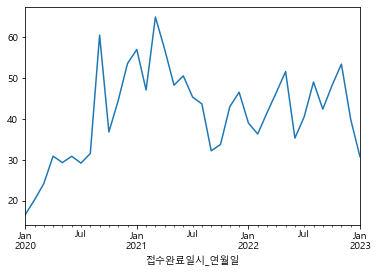

In [30]:
voice_df['접수완료일시'].resample('M').mean().plot()

In [31]:
voice_df['접수완료일시'].resample('Q').mean()

접수완료일시_연월일
2020-03-31    20.411111
2020-06-30    30.384615
2020-09-30    40.217391
2020-12-31    44.967391
2021-03-31    56.622222
2021-06-30    51.890110
2021-09-30    40.510870
2021-12-31    41.086957
2022-03-31    39.044444
2022-06-30    44.538462
2022-09-30    44.010870
2022-12-31    47.108696
2023-03-31    30.777778
Freq: Q-DEC, Name: 접수완료일시, dtype: float64

### 1Day ARIMA

#### ARIMA 모수 설정(1 Day)

In [32]:
voice_df

,접수완료일시,Change,Diff,SMA7,SMA14,CMA,EWM_short,EWM_long
접수완료일시_연월일,,,,,,,,
2020-01-02,29.0,NaN,NaN,NaN,NaN,NaN,29.000000,29.000000
2020-01-03,31.0,0.068966,2.0,NaN,NaN,NaN,30.083333,30.008333
2020-01-04,6.0,-0.806452,-25.0,NaN,NaN,NaN,20.683603,21.871809
2020-01-05,2.0,-0.666667,-4.0,NaN,NaN,NaN,14.785920,16.778973
2020-01-06,14.0,6.000000,12.0,NaN,NaN,NaN,14.572388,16.204499
...,...,...,...,...,...,...,...,...
2023-01-14,12.0,-0.714286,-30.0,32.857143,34.714286,41.659152,33.284503,42.674611
2023-01-15,9.0,-0.250000,-3.0,33.000000,35.214286,41.629730,29.548426,42.118006
2023-01-16,23.0,1.555556,14.0,29.714286,33.428571,41.612961,28.540976,41.802006


c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


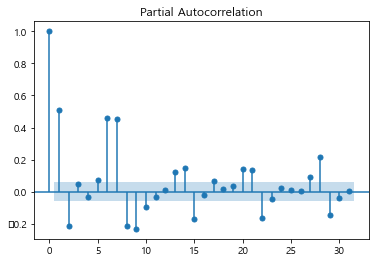

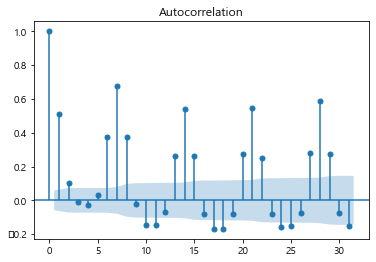

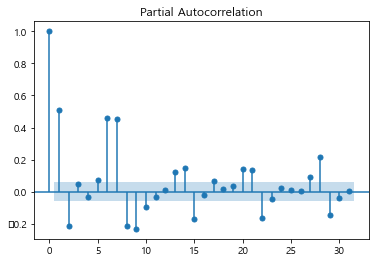

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(voice_df['접수완료일시'])
plot_pacf(voice_df['접수완료일시'])

c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


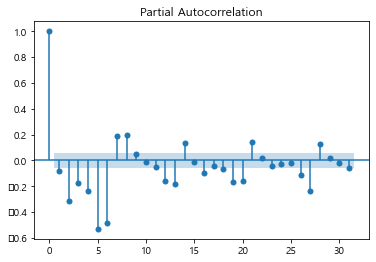

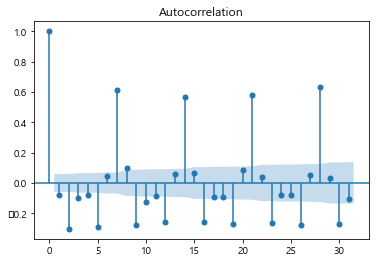

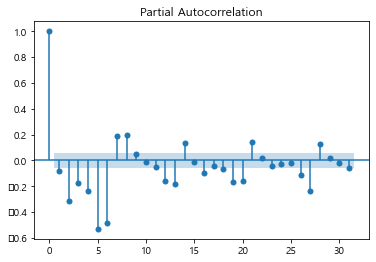

In [34]:
plot_acf(voice_df['Diff'].dropna())
plot_pacf(voice_df['Diff'].dropna())

In [35]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(voice_df['접수완료일시'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -4.621360087275772
p-value: 0.00011795292034953339
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [36]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(voice_df['Diff'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -11.052539230726044
p-value: 5.037796402137946e-20
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


#### ARIMA 모형 구축

In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(voice_df['접수완료일시'], order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 접수완료일시   No. Observations:                 1113
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4994.509
Date:                Mon, 13 Feb 2023   AIC                          10001.019
Time:                        12:46:42   BIC                          10031.107
Sample:                    01-02-2020   HQIC                         10012.395
                         - 01-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5553      1.156     35.937      0.000      39.289      43.822
ar.L1         -0.3184      0.111     -2.861      0.004      -0.536      -0.100
ar.L2         -0.1502      0.049     -3.064      0.0

In [38]:
start_index = pd.Timestamp(2022,6,1)
end_index = pd.Timestamp(2023,1,18)

forecast = model_fit.predict(start=start_index, end=end_index, typ='linear')

c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [39]:
forecast

접수완료일시_연월일
2022-06-01    49.684222
2022-06-02    24.885041
2022-06-03    57.301402
2022-06-04    45.792694
2022-06-05    19.527514
                ...    
2023-01-14    41.000875
2023-01-15    24.038998
2023-01-16    28.295015
2023-01-17    40.177197
2023-01-18    31.419888
Freq: D, Name: predicted_mean, Length: 232, dtype: float64

In [40]:
#test_start = pd.Timestamp(2023,1,19)
#test_end = pd.Timestamp(2023,6,30)
#forecast2 = model_fit.predict(start=test_start, end=test_end, typ='linear')

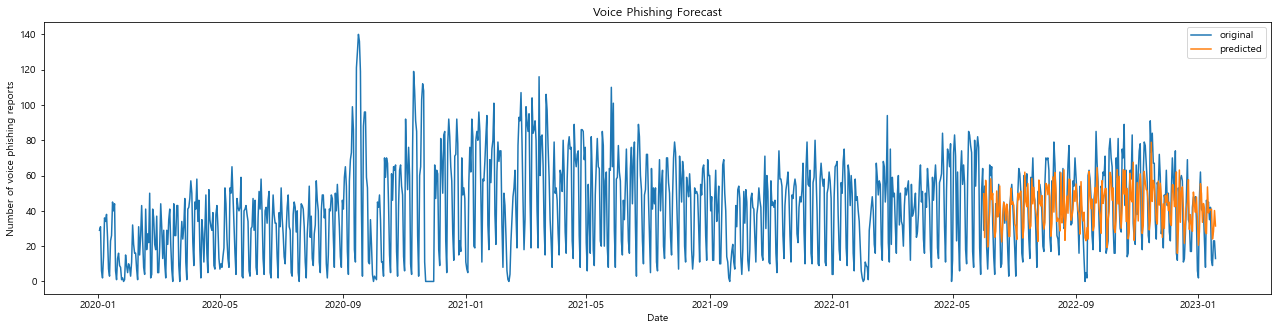

In [41]:
plt.figure(figsize=(22,5))
plt.plot(voice_df.index, voice_df['접수완료일시'], label='original')
plt.plot(forecast,label='predicted')
plt.title("Voice Phishing Forecast")
plt.xlabel('Date')
plt.ylabel('Number of voice phishing reports')
plt.legend()
plt.show()

#### 잔차분석

No handles with labels found to put in legend.
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


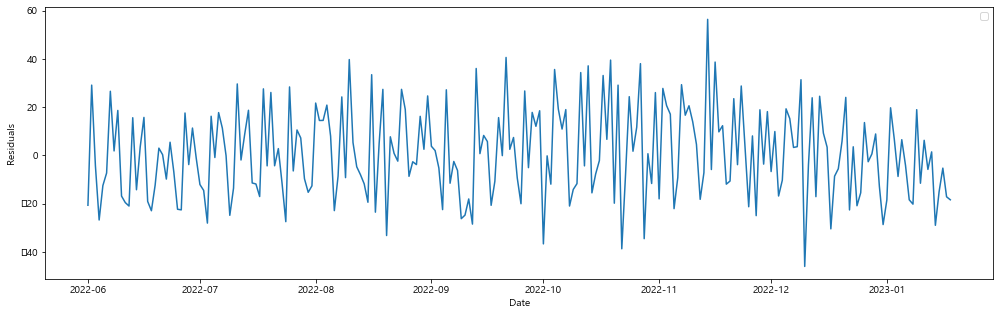

In [42]:
resid = np.array(voice_df.loc[voice_df.index >= start_index,'접수완료일시']) - np.array(forecast)
resid

plt.figure(figsize=(17,5))
plt.plot(voice_df[voice_df.index >= start_index].index, resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


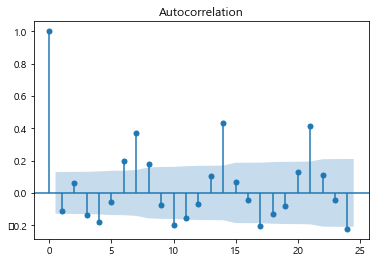

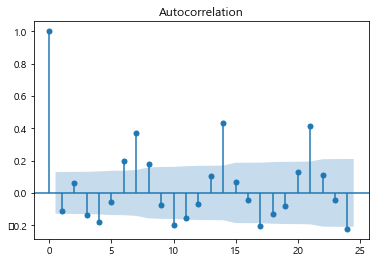

In [43]:
plot_acf(resid)

In [44]:
result = adfuller(resid)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.921476562743447
p-value: 0.32202627784408566
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


In [45]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true,y_pred)*100 ,3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False),3)

    df = pd.DataFrame({'R2':r2, 'Corr':corr, 'RMSE':rmse, 'MAPE': mape}, index=[0])
    return df

In [46]:
scoring(np.array(voice_df.loc[voice_df.index >=
                              start_index, '접수완료일시']), np.array(forecast))


,R2,Corr,RMSE,MAPE
0,22.351,0.481,18.619,4.809904e+16


### 1W ARIMA

In [53]:
voice_df_week = voice_df['접수완료일시'].resample('W').mean()
voice_df_week

접수완료일시_연월일
2020-01-05    17.000000
2020-01-12    22.428571
2020-01-19    26.428571
2020-01-26     7.000000
2020-02-02     7.285714
                ...    
2022-12-25    35.000000
2023-01-01    32.142857
2023-01-08    37.428571
2023-01-15    33.000000
2023-01-22    19.666667
Freq: W-SUN, Name: 접수완료일시, Length: 160, dtype: float64

c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


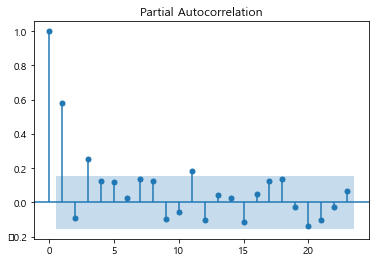

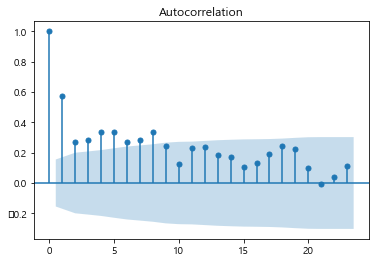

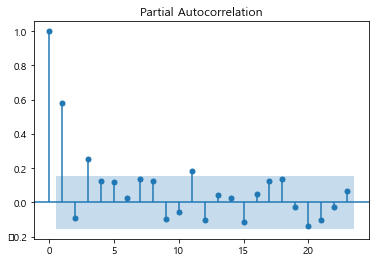

In [54]:
plot_acf(voice_df_week)
plot_pacf(voice_df_week)

<AxesSubplot:xlabel='접수완료일시_연월일'>

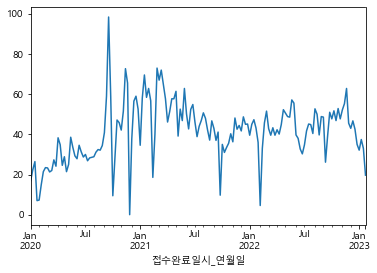

In [57]:
voice_df_week.plot()

### 1M ARIMA

#### ARIMA 모수 설정 (1 MONTH)

In [50]:
voice_df_month = voice_df['접수완료일시'].resample('M').mean()
voice_df_month


접수완료일시_연월일
2020-01-31    16.633333
2020-02-29    20.241379
2020-03-31    24.225806
2020-04-30    30.933333
2020-05-31    29.354839
2020-06-30    30.900000
2020-07-31    29.225806
2020-08-31    31.580645
2020-09-30    60.500000
2020-10-31    36.838710
2020-11-30    44.500000
2020-12-31    53.548387
2021-01-31    56.967742
2021-02-28    47.071429
2021-03-31    64.903226
2021-04-30    57.000000
2021-05-31    48.258065
2021-06-30    50.533333
2021-07-31    45.354839
2021-08-31    43.677419
2021-09-30    32.233333
2021-10-31    33.774194
2021-11-30    43.000000
2021-12-31    46.548387
2022-01-31    39.032258
2022-02-28    36.321429
2022-03-31    41.516129
2022-04-30    46.466667
2022-05-31    51.580645
2022-06-30    35.333333
2022-07-31    40.548387
2022-08-31    49.032258
2022-09-30    42.400000
2022-10-31    48.225806
2022-11-30    53.400000
2022-12-31    39.903226
2023-01-31    30.777778
Freq: M, Name: 접수완료일시, dtype: float64

c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


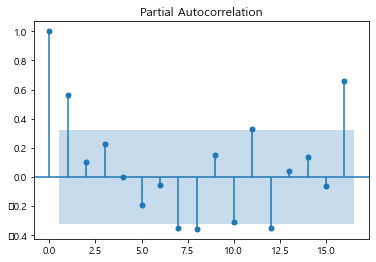

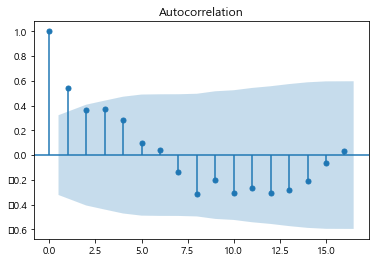

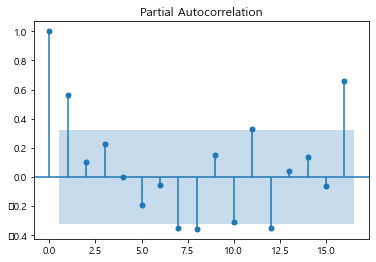

In [52]:
plot_acf(voice_df_month)
plot_pacf(voice_df_month)

<AxesSubplot:xlabel='접수완료일시_연월일'>

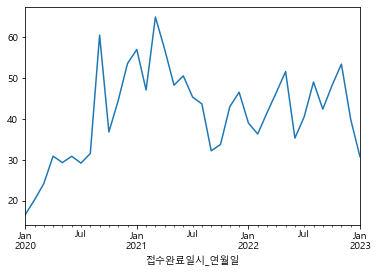

In [56]:
voice_df_month.plot()

In [59]:
voice_df_month.diff().dropna()

접수완료일시_연월일
2020-02-29     3.608046
2020-03-31     3.984427
2020-04-30     6.707527
2020-05-31    -1.578495
2020-06-30     1.545161
2020-07-31    -1.674194
2020-08-31     2.354839
2020-09-30    28.919355
2020-10-31   -23.661290
2020-11-30     7.661290
2020-12-31     9.048387
2021-01-31     3.419355
2021-02-28    -9.896313
2021-03-31    17.831797
2021-04-30    -7.903226
2021-05-31    -8.741935
2021-06-30     2.275269
2021-07-31    -5.178495
2021-08-31    -1.677419
2021-09-30   -11.444086
2021-10-31     1.540860
2021-11-30     9.225806
2021-12-31     3.548387
2022-01-31    -7.516129
2022-02-28    -2.710829
2022-03-31     5.194700
2022-04-30     4.950538
2022-05-31     5.113978
2022-06-30   -16.247312
2022-07-31     5.215054
2022-08-31     8.483871
2022-09-30    -6.632258
2022-10-31     5.825806
2022-11-30     5.174194
2022-12-31   -13.496774
2023-01-31    -9.125448
Freq: M, Name: 접수완료일시, dtype: float64

c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


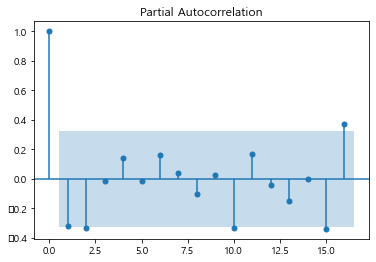

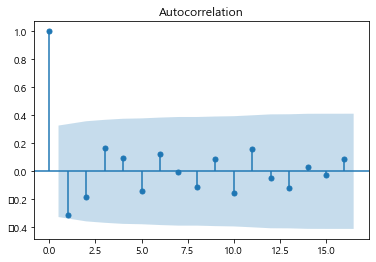

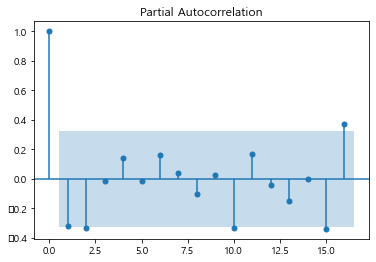

In [60]:
plot_acf(voice_df_month.diff().dropna())
plot_pacf(voice_df_month.diff().dropna())

In [61]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(voice_df_month)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -3.4113456085748326
p-value: 0.010578127830986876
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


In [62]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(voice_df_month.diff().dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -6.337438646167356
p-value: 2.8080275113952308e-08
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


#### ARIMA 모형 구축(1 MONTH)

In [99]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(voice_df_month, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 접수완료일시   No. Observations:                   37
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -132.341
Date:                Mon, 13 Feb 2023   AIC                            274.681
Time:                        14:42:04   BIC                            282.736
Sample:                    01-31-2020   HQIC                           277.521
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1038      4.965      7.675      0.000      28.373      47.834
ar.L1          0.9009      0.946      0.952      0.341      -0.954       2.755
ar.L2         -0.0308      0.684     -0.045      0.9

c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [151]:
start_index = pd.Timestamp(2020, 2, 29)
end_index = pd.Timestamp(2023, 12, 31)

forecast = model_fit.predict(start=start_index, end=end_index)


c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [152]:
forecast

2020-02-29    23.749330
2020-03-31    24.016561
2020-04-30    26.067498
2020-05-31    30.093239
2020-06-30    30.743605
2020-07-31    31.819961
2020-08-31    31.384310
2020-09-30    32.420867
2020-10-31    47.045177
2020-11-30    40.430511
2020-12-31    42.247677
2021-01-31    47.217878
2021-02-28    50.651017
2021-03-31    47.059020
2021-04-30    54.703047
2021-05-31    53.365489
2021-06-30    48.749360
2021-07-31    48.261879
2021-08-31    45.437031
2021-09-30    43.618183
2021-10-31    37.280236
2021-11-30    35.812279
2021-12-31    39.720766
2022-01-31    42.779689
2022-02-28    40.206165
2022-03-31    38.051672
2022-04-30    39.821874
2022-05-31    42.826292
2022-06-30    46.421613
2022-07-31    39.708528
2022-08-31    40.049500
2022-09-30    44.215237
2022-10-31    42.376600
2022-11-30    44.707896
2022-12-31    48.031785
2023-01-31    42.563968
2023-02-28    36.248774
2023-03-31    36.658516
2023-04-30    36.858939
2023-05-31    37.026866
2023-06-30    37.171971
2023-07-31    37

In [153]:
forecast.shift(-1)

2020-02-29    24.016561
2020-03-31    26.067498
2020-04-30    30.093239
2020-05-31    30.743605
2020-06-30    31.819961
2020-07-31    31.384310
2020-08-31    32.420867
2020-09-30    47.045177
2020-10-31    40.430511
2020-11-30    42.247677
2020-12-31    47.217878
2021-01-31    50.651017
2021-02-28    47.059020
2021-03-31    54.703047
2021-04-30    53.365489
2021-05-31    48.749360
2021-06-30    48.261879
2021-07-31    45.437031
2021-08-31    43.618183
2021-09-30    37.280236
2021-10-31    35.812279
2021-11-30    39.720766
2021-12-31    42.779689
2022-01-31    40.206165
2022-02-28    38.051672
2022-03-31    39.821874
2022-04-30    42.826292
2022-05-31    46.421613
2022-06-30    39.708528
2022-07-31    40.049500
2022-08-31    44.215237
2022-09-30    42.376600
2022-10-31    44.707896
2022-11-30    48.031785
2022-12-31    42.563968
2023-01-31    36.248774
2023-02-28    36.658516
2023-03-31    36.858939
2023-04-30    37.026866
2023-05-31    37.171971
2023-06-30    37.297519
2023-07-31    37

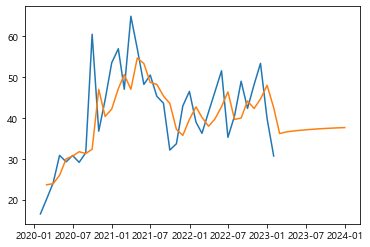

In [155]:
plt.plot(voice_df_month.index, voice_df_month, label = 'original')
plt.plot(forecast, label='predicted')


In [118]:
start2023 = '2023-01-31'
end2023 = '2023-12-31'
date_list2023 = pd.date_range(start=start2023, end=end2023, freq='M')
date_list2023


DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [119]:
pd.DataFrame(index=date_list2023)

""
2023-01-31
2023-02-28
2023-03-31
2023-04-30
2023-05-31
2023-06-30
2023-07-31
2023-08-31
2023-09-30
2023-10-31


In [140]:
until_2023 = pd.concat([voice_df_month,pd.DataFrame(index=date_list2023)])
until_2023


,0
2020-01-31,16.633333
2020-02-29,20.241379
2020-03-31,24.225806
2020-04-30,30.933333
2020-05-31,29.354839
2020-06-30,30.900000
2020-07-31,29.225806
2020-08-31,31.580645
2020-09-30,60.500000
2020-10-31,36.838710


In [141]:
result = model.fit()
result.summary()

c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 접수완료일시   No. Observations:                   37
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -132.341
Date:                Mon, 13 Feb 2023   AIC                            274.681
Time:                        16:41:50   BIC                            282.736
Sample:                    01-31-2020   HQIC                           277.521
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1038      4.965      7.675      0.000      28.373      47.834
ar.L1          0.9009      0.946      0.952      0.341      -0.954       2.755
ar.L2         -0.0308      0.684     -0.045      0.964      -1.372       1.310
ma.L1         -0.4073      0.912     -0.447      0.655      -2.194       1.380
sigma2        73.4043     14.642      5.013      0.000      44.707     102.101
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 5.22
Prob(Q):                              0.69   Prob(JB):                         0.07
Heteroskedasticity (H):               0.51   Skew:                             0.68
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\pgho8\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2023-01-31    42.563968
2023-02-28    36.248774
2023-03-31    36.658516
2023-04-30    36.858939
2023-05-31    37.026866
2023-06-30    37.171971
2023-07-31    37.297519
2023-08-31    37.406150
2023-09-30    37.500146
2023-10-31    37.581476
2023-11-30    37.651849
2023-12-31    37.712740
Freq: M, dtype: float64